<a href="https://colab.research.google.com/github/marybello/Facemask-detection/blob/main/NoseMask_Datathon.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf



In [ ]:
!unzip "/content/drive/My Drive/face_mask_detection.zip" -d "/content/"

In [ ]:
df_train = pd.read_csv('face_mask_detection/Training_set_face_mask.csv')

In [ ]:
df_train.head()

,filename,label
0,Image_1.jpg,without_mask
1,Image_2.jpg,without_mask
2,Image_3.jpg,without_mask
3,Image_4.jpg,without_mask
4,Image_5.jpg,without_mask


In [ ]:
df_train.shape

(11264, 2)

In [ ]:
import cv2
images_mask =[]
labels_with = []
images_without = []
labels_without = []

In [ ]:
for name, label in zip(df_train['filename'], df_train['label']):
  if label == "without_mask":
    image = cv2.imread("face_mask_detection/train/" + name)
    r = cv2.resize(image, (48,48)) 
    images_without.append(r)
    labels_without.append(label)
  else:
    image =  cv2.imread("face_mask_detection/train/" + name)
    r = cv2.resize(image, (48,48))
    images_mask.append(r)
    labels_with.append(label) 


In [ ]:
from google.colab.patches import cv2_imshow


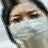

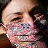

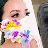

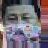

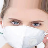

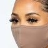

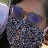

In [ ]:
for i in images_mask[0:7]:
  cv2_imshow(i)

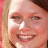

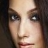

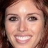

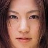

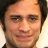

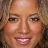

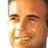

In [ ]:
for i in images_without[0:7]:
  cv2_imshow(i)

In [ ]:
images_mask.extend(images_without)
labels_with.extend(labels_without)

In [ ]:
labels_with = np.array(labels_with)
images_mask = np.array(images_mask)

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(images_mask, labels_with, test_size=0.2)


In [ ]:
from keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(rescale=1./255)

In [ ]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

In [ ]:
from keras import Sequential
from keras.layers import Conv2D, Dense, BatchNormalization, MaxPool2D, Flatten
from keras.optimizers import Adam

In [ ]:
model = Sequential()
model.add(Conv2D(32, (3,3), activation='relu', input_shape=(48,48,3)))
model.add(BatchNormalization())
model.add(Conv2D(32, (3,3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(64, (3,3), activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(64, (3,3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Flatten())

#fully connected layer
model.add(Dense(512, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 46, 46, 32)        896       
_________________________________________________________________
batch_normalization (BatchNo (None, 46, 46, 32)        128       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 44, 44, 32)        9248      
_________________________________________________________________
batch_normalization_1 (Batch (None, 44, 44, 32)        128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 22, 22, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 20, 20, 64)        18496     
_________________________________________________________________
batch_normalization_2 (Batch (None, 20, 20, 64)        2

In [ ]:
from keras.utils import to_categorical
y_trainS = pd.Series(y_train)
y_testS = pd.Series(y_test)
y_train = y_trainS.map({'with_mask':0, 'without_mask':1})
y_test = y_testS.map({'with_mask':0, 'without_mask':1})

In [ ]:
y_train = y_train.to_numpy()
y_test = y_test.to_numpy()

In [ ]:
y_train =to_categorical(y_train,2)
y_test = to_categorical(y_test, 2)

In [ ]:
y_train[8]

1

In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
history = model.fit(datagen.flow(x_train, y_train), epochs=20, batch_size=32, validation_data=datagen.flow(x_test, y_test, shuffle=False))

Epoch 1/20
282/282 [==============================] - 3s 9ms/step - loss: 0.1500 - accuracy: 0.9516 - val_loss: 0.3586 - val_accuracy: 0.8415
Epoch 2/20
282/282 [==============================] - 2s 8ms/step - loss: 0.0696 - accuracy: 0.9766 - val_loss: 0.1331 - val_accuracy: 0.9574
Epoch 3/20
282/282 [==============================] - 2s 8ms/step - loss: 0.0596 - accuracy: 0.9801 - val_loss: 0.2170 - val_accuracy: 0.9130
Epoch 4/20
282/282 [==============================] - 2s 8ms/step - loss: 0.0418 - accuracy: 0.9857 - val_loss: 0.5805 - val_accuracy: 0.6733
Epoch 5/20
282/282 [==============================] - 2s 8ms/step - loss: 0.0333 - accuracy: 0.9872 - val_loss: 0.0906 - val_accuracy: 0.9703
Epoch 6/20
282/282 [==============================] - 2s 8ms/step - loss: 0.0311 - accuracy: 0.9889 - val_loss: 0.1022 - val_accuracy: 0.9618
Epoch 7/20
282/282 [==============================] - 2s 8ms/step - loss: 0.0304 - accuracy: 0.9889 - val_loss: 0.0682 - val_accuracy: 0.9800
Epoch 

In [ ]:
model.save('my_model.h5')

In [ ]:
import matplotlib.pyplot as plt


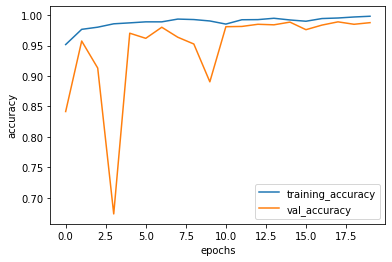

In [ ]:
plt.plot(history.history['accuracy'], label='training_accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.legend()
plt.xlabel('epochs')
plt.ylabel('accuracy')

plt.show()

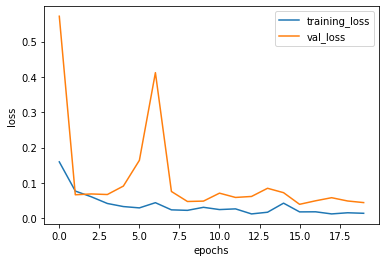

In [ ]:
plt.plot(history.history['loss'], label='training_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.legend()
plt.xlabel('epochs')
plt.ylabel('loss')

plt.show()

In [ ]:
test_df = pd.read_csv('face_mask_detection/Testing_set_face_mask.csv')

In [ ]:
test_images = []
for i in test_df['filename']:
  image = cv2.imread('face_mask_detection/test/' + i)
  r = cv2.resize(image, (48,48))
  test_images.append(r)

In [ ]:
test_images = np.array(test_images)

In [ ]:
test_images = test_images.astype('float32')

In [ ]:
test_images = test_images/255 

In [ ]:
test_images[0]

In [ ]:
predictions = model.predict(test_images)

In [ ]:
predictionsV = []
for i in predictions:
  if i < 0.5:
    value = 0
  else:
    value = 1
  predictionsV.append(value)    

In [ ]:
Anss= pd.Series(predictionsV)

In [ ]:
mapper = {0:'with_mask', 1:'without_mask'}


In [ ]:
Anss = Anss.map(mapper)

In [ ]:
pred = Anss.to_numpy()

In [ ]:
pred.tofile('pred.csv', sep=',')